# Transform Vectors with Matrices

The most basic vectors are $v_0 = \begin{pmatrix}1 \\ 0\end{pmatrix}$ and $v_1 = \begin{pmatrix}0 \\ 1\end{pmatrix}$

Any $2d$ point can be constructed with these two vectors.

Using these $v_0$ and $v_1$

```
# This is formatted as code
```

construct the remainder of the vectors $v_i$ in this lesson with matrix multiplication.

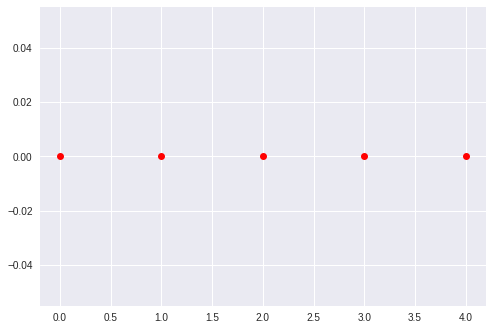

In [2]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import matplotlib.pyplot as plt

v_0 = np.matrix([[1],[0]])
v_1 = np.matrix([[0],[1]])

# You can build vectors using a loop:
#for i in [0,1,2,3,4]:
#  print(i * v_0)

# Or you can build them with a map
t_0 = np.column_stack(map(lambda x: x * v_0, [0,1,2,3,4]))
plt.plot(t_0[0:1:,::],t_0[1:2:,::],'ro');

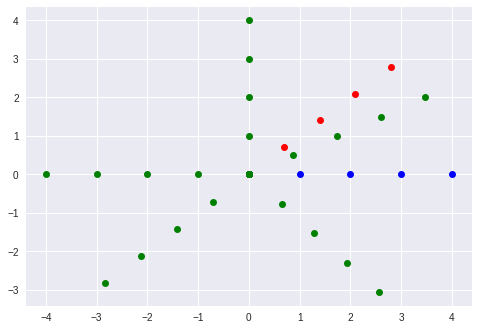

In [3]:
# Multiplying these vectors by a matrix allows us to transform them in interesting ways

R = np.matrix([[0.7,-0.7],[0.7,0.7]])
rotated = R * t_0
plt.plot(rotated[0:1:,::],rotated[1:2:,::],'ro');

# write a function that creates a rotation matrix R, taking only (theta) as argument
def get_rotation_matrix(theta):
    R = np.matrix([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    return R # you fill this out

# us it to transform t_0 around the origin and graph together
# rotate by: 30, 90, 180, 225, and 310.

plt.plot(t_0[0:1:,::], t_0[1:2:,::], 'bo')
for theta in [30, 90, 180, 225, 310]:
    theta = theta * (np.pi/180)
    R = get_rotation_matrix(theta)
    rotated = (R * t_0)
    plt.plot(rotated[0:1:,::], rotated[1:2:,::], 'go')

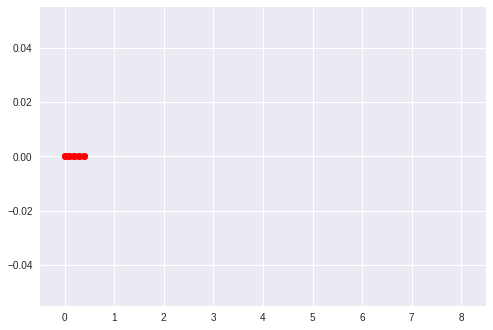

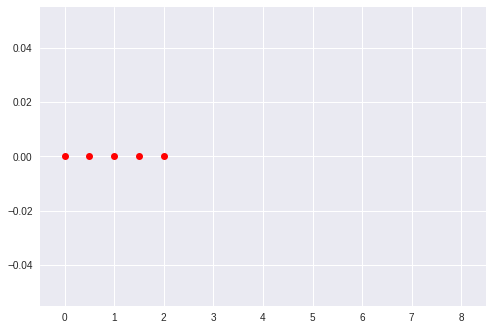

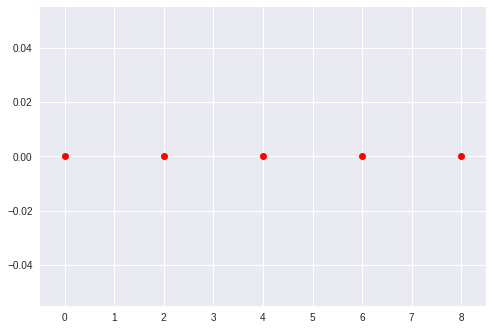

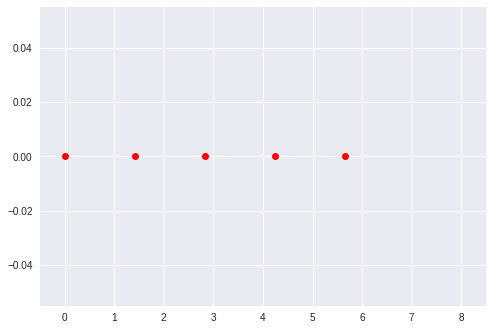

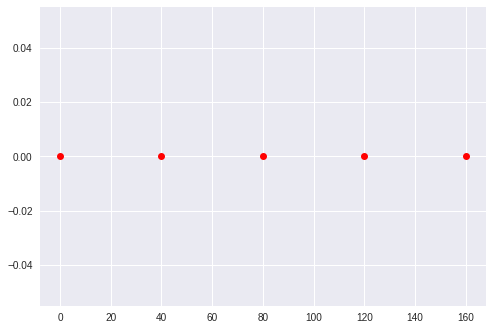

In [4]:
# Multiplying these vectors by a matrix allows us to shrink or grow them

S = np.matrix([[0.1,0],[0,0.1]])
scaled = S * t_0
plt.plot(scaled[0:1:,::],scaled[1:2:,::],'ro');
plt.xlim(0, 10)

# Write a function to create a scaling matrix
def get_scale_matrix(scale):
    S = scale * np.eye(2)
    return np.asmatrix(S) # you fill this out

# Use it and your rotation matrix to scale the rotated values from above by
# 0.1, 0.5, 2.0, sqrt(2), and 40

for scale in [0.1, 0.5, 2.0, np.sqrt(2)]:
    S = get_scale_matrix(scale)
    scaled = S * t_0
    plt.plot(scaled[0:1:,::], scaled[1:2:,::], 'ro');
    plt.xlim(-0.5, 8.5)
    plt.show()

S = get_scale_matrix(40)
scaled = S * t_0
plt.plot(scaled[0:1:,::], scaled[1:2:,::], 'ro');

In [5]:
print(scaled.shape)

(2, 5)


In [0]:
# Translation requires a special kind of matrix we will study tomorrow
# You can translate with v_0 + x

# You'll need to translate v_0 in order to reproduce sample_1 and sample_2 below

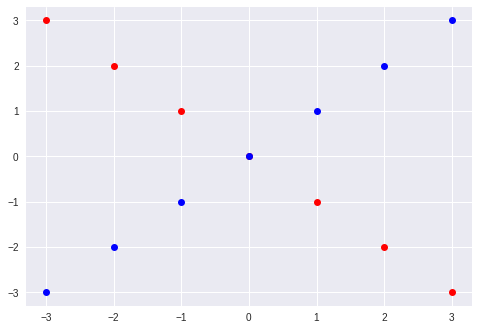

In [7]:
# Use linear algebra to reproduce the following points:

sample_1 = np.matrix([[3,2,1,0,-1,-2,-3],[-3,-2,-1,0,1,2,3]])
sample_2 = np.matrix([[-3,-2,-1,0,1,2,3],[-3,-2,-1,-0,1,2,3]])
t_1 = sample_1
t_2 = sample_2
plt.plot(t_1[0:1:,::],t_1[1:2:,::],'ro');
plt.plot(t_2[0:1:,::],t_2[1:2:,::],'bo');


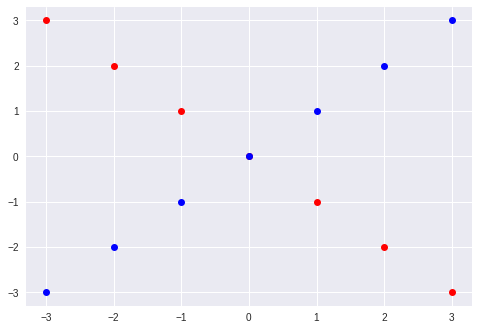

In [8]:
v_0 = np.matrix([[1],[0]])
v_1 = np.matrix([[0],[1]])

t_0 = np.column_stack(map(lambda x: x*v_0, range(-3,4)))

# finding transform matrices by inspection
transform_1 = np.matrix([[1,-1],[1,1]]).T
t_1 = transform_1 * t_0
plt.plot(t_1[0:1:,::], t_1[1:2:,::], 'ro')

transform_2 = np.matrix([[1,1],[-1,1]]).T
t_2 = transform_2 * t_0
plt.plot(t_2[0:1:,::], t_2[1:2:,::],'bo');

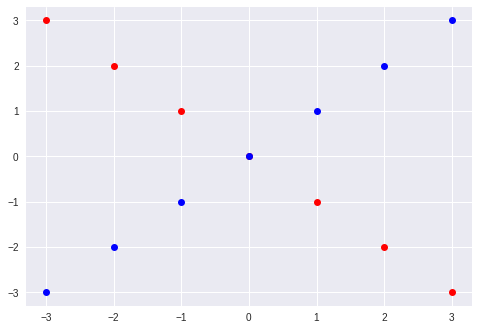

In [9]:
# finding transform matrices using functions from project
theta = -np.pi / 4
R_1 = get_rotation_matrix(theta)
scale = np.sqrt(2)
S_1 = get_scale_matrix(scale)

transform_1 = S_1 * R_1
t_1 = transform_1 * t_0
plt.plot(t_1[0:1:,::], t_1[1:2:,::], 'ro')

theta = np.pi / 4
R_2 = get_rotation_matrix(theta)
scale = np.sqrt(2)
S_2 = get_scale_matrix(scale)

transform_2 = S_2 * R_2
t_2 = transform_2 * t_0
plt.plot(t_2[0:1:,::], t_2[1:2:,::], 'bo');

In [0]:
# Draw me something using the rules above

t_1 = np.column_stack(map(lambda x: x*v_0, range(-3,4)))

def draw_line(x_1, x_2, num_dots=10):
    x_1, x_2 = np.array(x_1), np.array(x_2)
    
    length = np.linalg.norm(x_2-x_1)
    t_0 = np.column_stack(map(lambda x: x*v_0, np.linspace(0, 1, num_dots)))
    
    theta = np.arcsin((x_2[1]-x_1[1])/length)
    R = get_rotation_matrix(theta)
    
    S = get_scale_matrix(length)
    
    line = (S * R * t_0) + x_1.reshape((2,1))
    plt.plot(line[0:1:,::], line[1:2:,::], 'bo')
    return line

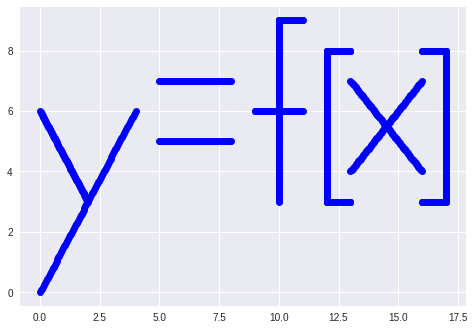

In [0]:
lines = [[(0,0), (4,6)],
         [(0,6), (2,3)],
         [(5,7), (8,7)],
         [(5,5), (8,5)],
         [(9,6), (11,6)],
         [(10,3), (10,9)],
         [(10,9), (11,9)],
         [(12,3), (12,8)],
         [(12,8), (13,8)],
         [(12,3), (13,3)],
         [(13,4), (16,7)],
         [(13,7), (16,4)],
         [(16,3), (17,3)],
         [(16,8), (17,8)],
         [(17,3), (17,8)]]

num_dots = 100
for line in lines:
    draw_line(line[0], line[1], num_dots)
